In [610]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn', stakeoverflow suggestion
import matplotlib.pyplot as plt
from matplotlib import colors                 #from documentation
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [532]:
train = pd.read_csv("train.csv") 
test =  pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [533]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [534]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [535]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [536]:
test["PassengerId"]

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [537]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [538]:
columns = test.columns
columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [539]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [540]:
train2["CryoSleep"].replace({False: "False", True :"True"}, inplace = True)

In [561]:
train["PassengerId"].fillna("0000_00",inplace = True)
test["PassengerId"].fillna("0000_00",inplace = True)
train["HomePlanet"].fillna("not available",inplace = True)
test["HomePlanet"].fillna("not available",inplace = True)
train["CryoSleep"].fillna("False",inplace = True)
test["CryoSleep"].fillna("False",inplace = True)
train["Cabin"].fillna("A/11/P",inplace = True)
test["Cabin"].fillna("A/11/P",inplace = True)
train["Destination"].fillna("55 Cancri e",inplace = True)
test["Destination"].fillna("55 Cancri e",inplace = True)
train["VIP"].fillna( True ,inplace = True)
test["VIP"].fillna( True,inplace = True)
train["Name"].fillna( "Narendra",inplace = True)
test["Name"].fillna("Narendra" ,inplace = True)

for col in columns:
    if train[col].dtype == "float" or train[col].dtype == "int":
        train[col].fillna(train[col].mean() ,inplace = True)
        test[col].fillna(train[col].mean(),inplace = True)
        

In [542]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [543]:
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [544]:
train1 = train.dropna()
test1 = test.dropna()

In [545]:
train1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [546]:
train1.shape

(8693, 14)

In [547]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


In [575]:
train["PassengerId"] = train["PassengerId"].astype(int)
test["PassengerId"] = test["PassengerId"].astype(int)

# train["HomePlanet"] = train["HomePlanet"].astype(int)
# train["CryoSleep"] = train["CryoSleep"].astype(int)
# train["Cabin"] = train["Cabin"].astype(int)
# train["Destination"] = train["Destination"].astype(int)

In [566]:
test_copy = test
test_copy["PassengerId"] = test_copy["PassengerId"].astype(int)
test_copy["PassengerId"]

0         1301
1         1801
2         1901
3         2101
4         2301
         ...  
4272    926602
4273    926901
4274    927101
4275    927301
4276    927701
Name: PassengerId, Length: 4277, dtype: int32

In [549]:
test1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.00000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,A/11/P,TRAPPIST-1e,42.00000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.82793,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,55 Cancri e,28.82793,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [550]:
test["Cabin"].value_counts()

A/11/P      102
G/160/P       8
D/273/S       7
E/228/S       7
B/31/P        7
           ... 
E/236/S       1
F/650/S       1
G/566/P       1
G/557/S       1
G/1498/S      1
Name: Cabin, Length: 3265, dtype: int64

In [551]:
train1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [401]:
test1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [552]:
train2 = train1
train2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [553]:
train2["Transported"].replace({ True : 1, False : 0},inplace = True)
train2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [554]:
train1["Transported"].value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

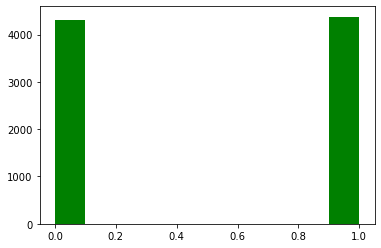

In [555]:
plt.hist(train2["Transported"], color = "g")
plt.show()

In [406]:
train2["Transported"].value_counts()/len(train2)

1    0.503624
0    0.496376
Name: Transported, dtype: float64

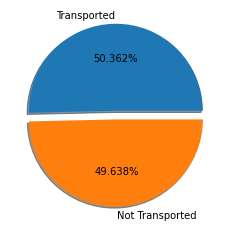

In [407]:
plt.pie(train2["Transported"].value_counts(), labels = ["Transported", "Not Transported"], autopct = "%.3f%%", explode = [0.05,0.05], shadow = True)
plt.show()

In [408]:
column = list(train2.columns)  #https://www.google.com/search?rlz=1C1VDKB_enIN1007IN1007&sxsrf=ALiCzsYL_lq8c26Oup8Vc7yY0P5frbVcHg:1658337896748&q=How+do+you+convert+an+object+to+a+list+in+Python%3F&sa=X&ved=2ahUKEwj_hYOK_of5AhW_UGwGHZeHALYQzmd6BAgREAU&biw=1536&bih=722&dpr=1.25
column

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [409]:
df = pd.DataFrame(train2, columns = train2.columns) #https://www.geeksforgeeks.org/get-the-data-type-of-column-in-pandas-python/
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
dtype: object

In [410]:
train2.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [556]:
train2.describe() #https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


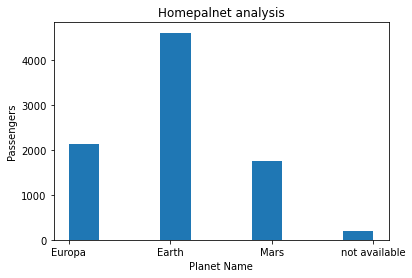

In [557]:
plt.hist(train2['HomePlanet'])
plt.xlabel("Planet Name")
plt.ylabel("Passengers")
plt.title("Homepalnet analysis")
plt.show()

In [558]:
train2.info() #https://www.analyticsvidhya.com/blog/2021/05/a-comprehensive-guide-to-data-analysis-using-pandas-hands-on-data-analysis-on-imdb-movies-data/

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: bool(1), float64(6), int64(1), object(6)
memory usage: 891.5+ KB


In [559]:
print(train2["HomePlanet"].value_counts())

Earth            4602
Europa           2131
Mars             1759
not available     201
Name: HomePlanet, dtype: int64


In [560]:
print(train2["HomePlanet"].value_counts()/len(train2))

Earth            0.529391
Europa           0.245140
Mars             0.202347
not available    0.023122
Name: HomePlanet, dtype: float64


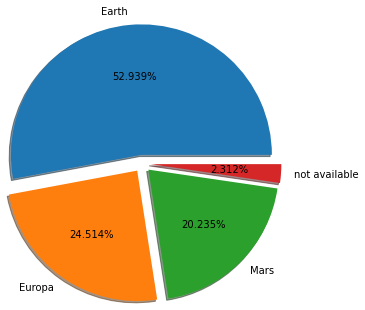

In [416]:
plt.pie(train2["HomePlanet"].value_counts(), radius = 1.5, autopct = "%.3f%%", shadow = True , labels = ["Earth", "Europa", "Mars","not available"], explode = [0.1,0.1,0.1,0.1])
plt.show()

In [417]:
train2["HomePlanet"].replace({"Earth" : 1, "Europa" : 2, "Mars" : 3,"not available":4}, inplace = True) #for predictions numbers are required
train2["HomePlanet"]

0       2
1       1
2       2
3       2
4       1
       ..
8688    2
8689    1
8690    1
8691    2
8692    2
Name: HomePlanet, Length: 8693, dtype: int64

In [418]:
train2["CryoSleep"]

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: object

In [430]:
train2["CryoSleep"].value_counts()

0    5656
1    3037
Name: CryoSleep, dtype: int64

In [600]:
train2["CryoSleep"].replace({False : "False", True: "True"}, inplace = True)
test["CryoSleep"].replace({False : "False", True: "True"}, inplace = True)
train2["CryoSleep"]


0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: object

In [603]:
test["CryoSleep"].replace({"False" : 0, "True": 1}, inplace = True)
test["CryoSleep"]

0       1
1       0
2       1
3       0
4       0
       ..
4272    1
4273    0
4274    1
4275    0
4276    1
Name: CryoSleep, Length: 4277, dtype: int64

In [604]:
test["CryoSleep"].value_counts()

0    2733
1    1544
Name: CryoSleep, dtype: int64

In [431]:
train2["CryoSleep"].replace({"False" : 0, "True": 1}, inplace = True)
train2["CryoSleep"]

0       0
1       0
2       0
3       0
4       0
       ..
8688    0
8689    1
8690    0
8691    0
8692    0
Name: CryoSleep, Length: 8693, dtype: int64

In [432]:
train2["CryoSleep"].value_counts()

0    5656
1    3037
Name: CryoSleep, dtype: int64

In [599]:
train["Cryosleep"] = train2["CryoSleep"]

<AxesSubplot:xlabel='CryoSleep', ylabel='Count'>

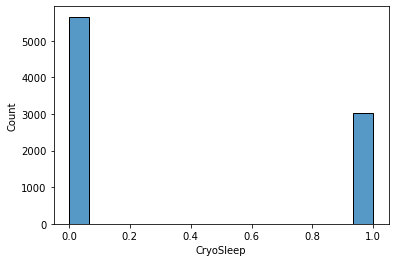

In [433]:
sns.histplot(train2["CryoSleep"])

In [434]:
train2["CryoSleep"].value_counts()

0    5656
1    3037
Name: CryoSleep, dtype: int64

In [435]:
train2["CryoSleep"].value_counts()/len(train2)

0    0.650638
1    0.349362
Name: CryoSleep, dtype: float64

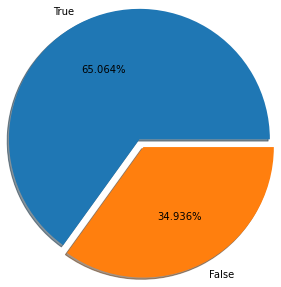

In [436]:
plt.pie(train2["CryoSleep"].value_counts(), radius = 1.5, labels = ["True", "False"],autopct = "%.3f%%", explode = [0.05, 0.05], shadow = True )
plt.show()

In [437]:
train2["CryoSleep"]

0       0
1       0
2       0
3       0
4       0
       ..
8688    0
8689    1
8690    0
8691    0
8692    0
Name: CryoSleep, Length: 8693, dtype: int64

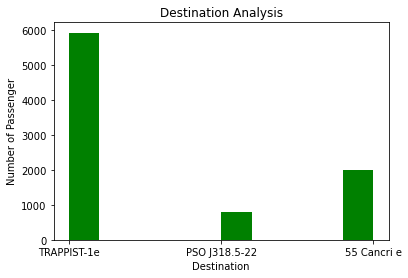

In [438]:
plt.hist(train2["Destination"], color = "g")
plt.title("Destination Analysis")
plt.xlabel("Destination")
plt.ylabel("Number of Passenger")
plt.show()

In [439]:
train2["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1982
PSO J318.5-22     796
Name: Destination, dtype: int64

In [440]:
train2["Destination"].value_counts()/len(train2)

TRAPPIST-1e      0.680433
55 Cancri e      0.228000
PSO J318.5-22    0.091568
Name: Destination, dtype: float64

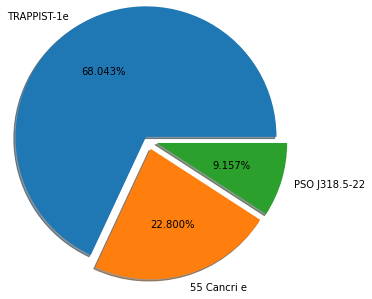

In [441]:
plt.pie(train2["Destination"].value_counts(), radius = 1.5, labels = ["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22"], autopct = "%.3f%%", explode = [0.05, 0.1,0.1], shadow = True)
plt.show()

In [442]:
train2["Destination"].replace({ "TRAPPIST-1e" : 1, "55 Cancri e" : 2, "PSO J318.5-22" : 3}, inplace = True)
train2["Destination"]  #again convertin into integer for prediction

0       1
1       1
2       1
3       1
4       1
       ..
8688    2
8689    3
8690    1
8691    2
8692    1
Name: Destination, Length: 8693, dtype: int64

In [443]:
train2["Age"]

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64

In [444]:
train2["Age_group"] = pd.cut( x = train2["Age"], bins = [-1,18.0,35.0,60.0,110.0], labels = ["child", "young adult", "middle age", "retired"])
train2["Age_group"]

0        middle age
1       young adult
2        middle age
3       young adult
4             child
           ...     
8688     middle age
8689          child
8690    young adult
8691    young adult
8692     middle age
Name: Age_group, Length: 8693, dtype: category
Categories (4, object): ['child' < 'young adult' < 'middle age' < 'retired']

In [445]:
train2["Age_group"].isnull().sum()

0

In [446]:
train2["Age"].min()

0.0

In [447]:
train2["Age_group"].value_counts()

young adult    4315
middle age     2293
child          1865
retired         220
Name: Age_group, dtype: int64

<AxesSubplot:xlabel='Age_group', ylabel='Count'>

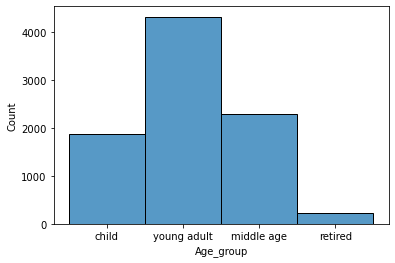

In [448]:
sns.histplot(train2["Age_group"])
# plt.show()

In [449]:
train2["Age_group"].value_counts()/len(train2["Age_group"])

young adult    0.496376
middle age     0.263775
child          0.214540
retired        0.025308
Name: Age_group, dtype: float64

In [450]:
len(train2["Age_group"])

8693

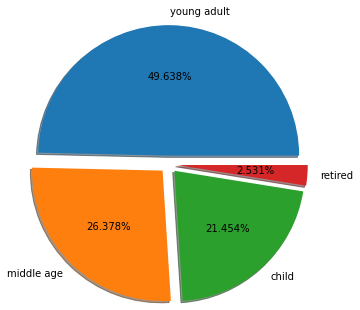

In [451]:
plt.pie(train2["Age_group"].value_counts(), radius = 1.5, labels = ["young adult", "middle age","child", "retired"], autopct ="%.3f%%", shadow = True, explode = [0.1,0.1,0.1,0.1])
plt.show()

In [452]:
len(train2["Age_group"])

8693

In [453]:
train2["Age_group"]= train2["Age_group"].replace({"child":1, "young adult":2, "middle age":3, "retired":4})
train2["Age_group"] = train2["Age_group"].astype(int)
train2["Age_group"]

0       3
1       2
2       3
3       2
4       1
       ..
8688    3
8689    1
8690    2
8691    2
8692    3
Name: Age_group, Length: 8693, dtype: int32

In [454]:
vip = train2["VIP"]
vip

0       False
1       False
2        True
3       False
4       False
        ...  
8688     True
8689    False
8690    False
8691    False
8692    False
Name: VIP, Length: 8693, dtype: bool

In [455]:
train2["VIP"].value_counts()

False    8291
True      402
Name: VIP, dtype: int64

In [348]:
# train["VIP"] = train["VIP"].replace({"True":"True", "False":"False", 0.023439340400471142 : "True" })

In [457]:
train2["VIP"].replace({ True : 1, False : 0, "not available":2}, inplace = True)
train2["VIP"]

0       0
1       0
2       1
3       0
4       0
       ..
8688    1
8689    0
8690    0
8691    0
8692    0
Name: VIP, Length: 8693, dtype: int64

In [459]:
vip.value_counts()/len(vip)

0    0.953756
1    0.046244
Name: VIP, dtype: float64

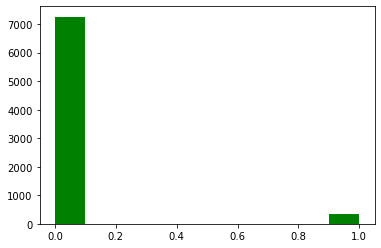

In [356]:
plt.hist(train2["VIP"], color  = "g")
plt.show()

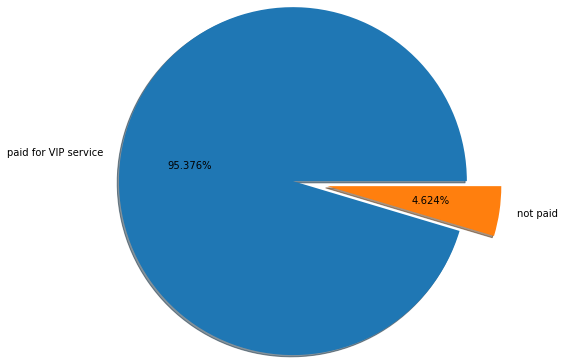

In [460]:
plt.pie(train2["VIP"].value_counts(), labels = ["paid for VIP service", "not paid"], autopct = "%.3f%%", explode = [0.2,0.2],shadow = True, radius  = 2)
plt.show()

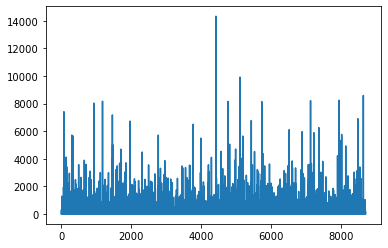

In [461]:
plt.plot(train2["RoomService"])
plt.show()

In [462]:
train2["RoomService"].max()

14327.0

In [463]:
train["RoomService"].min()

0.0

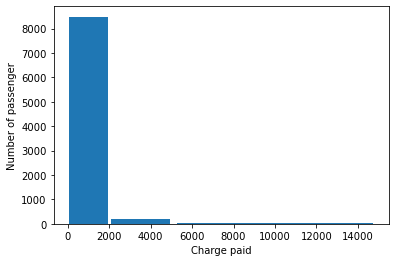

In [464]:
plt.hist(train2["RoomService"], bins = [0.0,2000.0,5000.0,15000.0],rwidth = 0.95)
plt.xlabel("Charge paid")
plt.ylabel("Number of passenger")
plt.show()

In [465]:
train2["RoomService"].value_counts()

0.000000       5577
224.687617      181
1.000000        117
2.000000         79
3.000000         61
               ... 
1612.000000       1
2598.000000       1
632.000000        1
378.000000        1
745.000000        1
Name: RoomService, Length: 1274, dtype: int64

In [466]:
train2["RoomService_group"]= pd.cut(x = train2["RoomService"], bins = [-1,2000.0,5000.0,15000.0], labels = ["low", "medium", "high"])
train2["RoomService_group"]

0       low
1       low
2       low
3       low
4       low
       ... 
8688    low
8689    low
8690    low
8691    low
8692    low
Name: RoomService_group, Length: 8693, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [467]:
train2["RoomService_group"].value_counts()

low       8487
medium     178
high        28
Name: RoomService_group, dtype: int64

In [468]:
room_s = train2["RoomService_group"]
room_s

0       low
1       low
2       low
3       low
4       low
       ... 
8688    low
8689    low
8690    low
8691    low
8692    low
Name: RoomService_group, Length: 8693, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [469]:
train2["RoomService_group"].replace({"low" : 1, "medium": 2, "high" : 3},inplace = True)
train2["RoomService_group"]= train2["RoomService_group"].astype(int)
train2["RoomService_group"]

0       1
1       1
2       1
3       1
4       1
       ..
8688    1
8689    1
8690    1
8691    1
8692    1
Name: RoomService_group, Length: 8693, dtype: int32

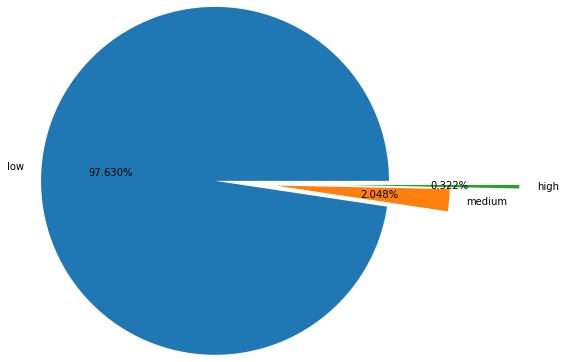

In [470]:
plt.pie(train2["RoomService_group"].value_counts(),radius = 2, labels = ["low", "medium", "high"], explode = [0.5,0.2,1],autopct = "%.3f%%")
plt.show()

In [471]:
train2["FoodCourt"].min()

0.0

In [472]:
train2["FoodCourt"].max()

29813.0

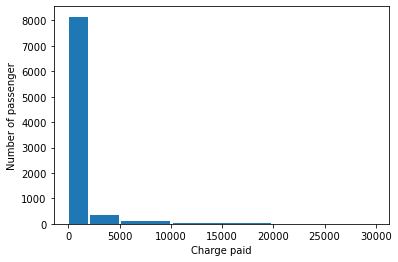

In [473]:
plt.hist(train2["FoodCourt"], bins = [-1,2000.0, 5000.0,10000.0,20000.0,30000.0],rwidth = 0.95)
plt.xlabel("Charge paid")
plt.ylabel("Number of passenger")
plt.show()

In [474]:
train2["FoodCourt_group"]= pd.cut(x = train2["FoodCourt"], bins = [-1,10000.0,20000.0,30000.0], labels = ["low", "medium", "high"])
train2["FoodCourt_group"]

0       low
1       low
2       low
3       low
4       low
       ... 
8688    low
8689    low
8690    low
8691    low
8692    low
Name: FoodCourt_group, Length: 8693, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [475]:
train2["FoodCourt_group"].value_counts()

low       8641
medium      47
high         5
Name: FoodCourt_group, dtype: int64

In [260]:
# food_c = train2["FoodCourt_group"]
# food_c

In [476]:
train2["FoodCourt_group"].replace({"low" : 1, "medium":2, "high":3},inplace = True)
train2["FoodCourt_group"] = train2["FoodCourt_group"].astype(int)
train2["FoodCourt_group"]

0       1
1       1
2       1
3       1
4       1
       ..
8688    1
8689    1
8690    1
8691    1
8692    1
Name: FoodCourt_group, Length: 8693, dtype: int32

In [477]:
train2["FoodCourt_group"].value_counts()

1    8641
2      47
3       5
Name: FoodCourt_group, dtype: int64

In [478]:
train2["FoodCourt_group"].value_counts()/len(train2)

1    0.994018
2    0.005407
3    0.000575
Name: FoodCourt_group, dtype: float64

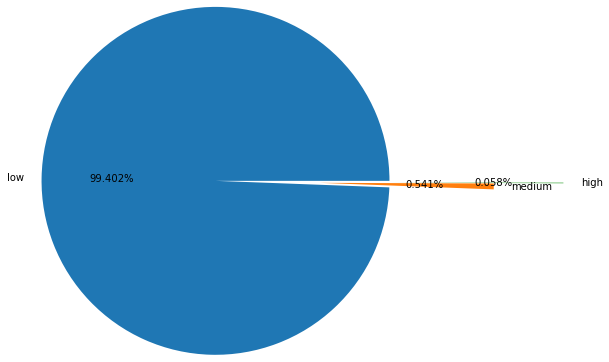

In [479]:
plt.pie(train2["FoodCourt_group"].value_counts(), radius = 2, labels = ["low", "medium", "high"], explode = [1,0.2,1],autopct = "%.3f%%")
plt.show()

In [480]:
train2["ShoppingMall"].min()

0.0

In [481]:
train2["ShoppingMall"].max()

23492.0

In [482]:
train2["ShoppingMall_group"] = pd.cut(x = train2["ShoppingMall"], bins = [-1,0,10000,20000.0,30000.0], labels = ["zero","low", "medium", "high"])
train2["ShoppingMall_group"]

0       zero
1        low
2       zero
3        low
4        low
        ... 
8688    zero
8689    zero
8690     low
8691    zero
8692    zero
Name: ShoppingMall_group, Length: 8693, dtype: category
Categories (4, object): ['zero' < 'low' < 'medium' < 'high']

In [483]:
train2["ShoppingMall_group"].value_counts()

zero      5587
low       3102
medium       3
high         1
Name: ShoppingMall_group, dtype: int64

In [484]:
train2["ShoppingMall_group"].value_counts()/len(train2)

zero      0.642701
low       0.356839
medium    0.000345
high      0.000115
Name: ShoppingMall_group, dtype: float64

In [485]:
S_mall = train2["ShoppingMall_group"]
S_mall

0       zero
1        low
2       zero
3        low
4        low
        ... 
8688    zero
8689    zero
8690     low
8691    zero
8692    zero
Name: ShoppingMall_group, Length: 8693, dtype: category
Categories (4, object): ['zero' < 'low' < 'medium' < 'high']

In [486]:
train2["ShoppingMall_group"].replace({"zero":1, "low":2, "medium":3, "high":4}, inplace = True)
train2["ShoppingMall_group"] = train2["ShoppingMall_group"].astype(int)
train2["ShoppingMall_group"]

0       1
1       2
2       1
3       2
4       2
       ..
8688    1
8689    1
8690    2
8691    1
8692    1
Name: ShoppingMall_group, Length: 8693, dtype: int32

In [487]:
S_mall.value_counts()

1    5587
2    3102
3       3
4       1
Name: ShoppingMall_group, dtype: int64

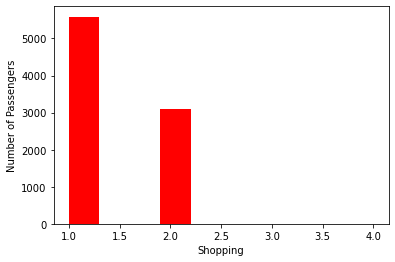

In [488]:
plt.hist(train2["ShoppingMall_group"], color = "r")
plt.xlabel("Shopping")
plt.ylabel("Number of Passengers")
plt.show()

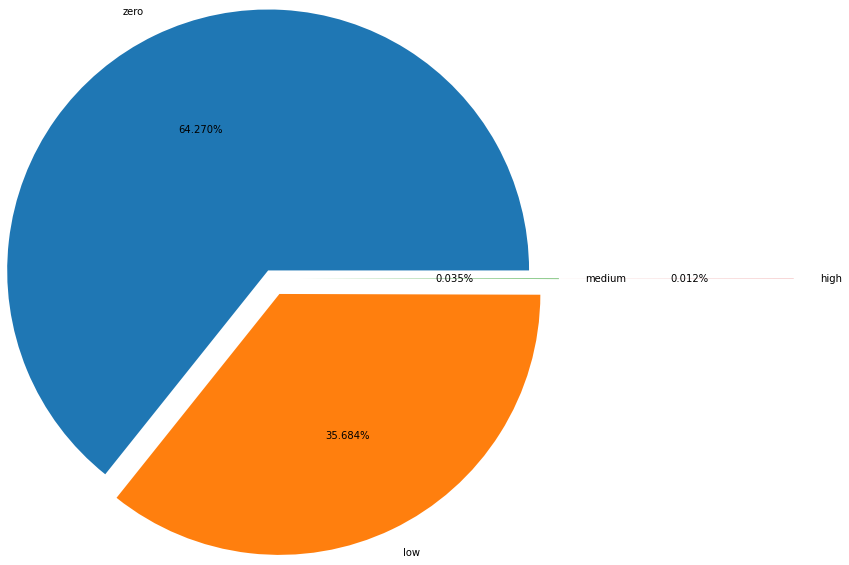

In [489]:
plt.pie(S_mall.value_counts(), labels = ["zero", "low","medium","high"], autopct = "%.3f%%", explode = [0.1,0.2,0.3,3],radius = 3)
plt.show()

In [490]:
train2["Spa"].min()

0.0

In [491]:
train2["Spa"].max()

22408.0

In [492]:
train2["Spa_group"] = pd.cut(x = train2["Spa"], bins = [-1,0,10000.0,20000.0,25000.0], labels = ["zero","low", "medium", "high"])
train2["Spa_group"]

0       zero
1        low
2        low
3        low
4        low
        ... 
8688     low
8689    zero
8690     low
8691     low
8692    zero
Name: Spa_group, Length: 8693, dtype: category
Categories (4, object): ['zero' < 'low' < 'medium' < 'high']

In [493]:
train2["Spa_group"].value_counts()

zero      5324
low       3345
medium      23
high         1
Name: Spa_group, dtype: int64

In [494]:
train2["Spa_group"].value_counts()/len(train2)

zero      0.612447
low       0.384792
medium    0.002646
high      0.000115
Name: Spa_group, dtype: float64

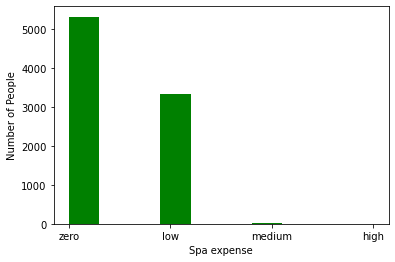

In [495]:
plt.hist(train2["Spa_group"],color = "g")
plt.xlabel("Spa expense")
plt.ylabel("Number of People")
plt.show()

In [496]:
train2["Spa_group"].replace({"zero": 1, "low": 2, "medium":3, "high":4},inplace = True)
train2["Spa_group"] = train2["Spa_group"].astype(int)
train2["Spa_group"]

0       1
1       2
2       2
3       2
4       2
       ..
8688    2
8689    1
8690    2
8691    2
8692    1
Name: Spa_group, Length: 8693, dtype: int32

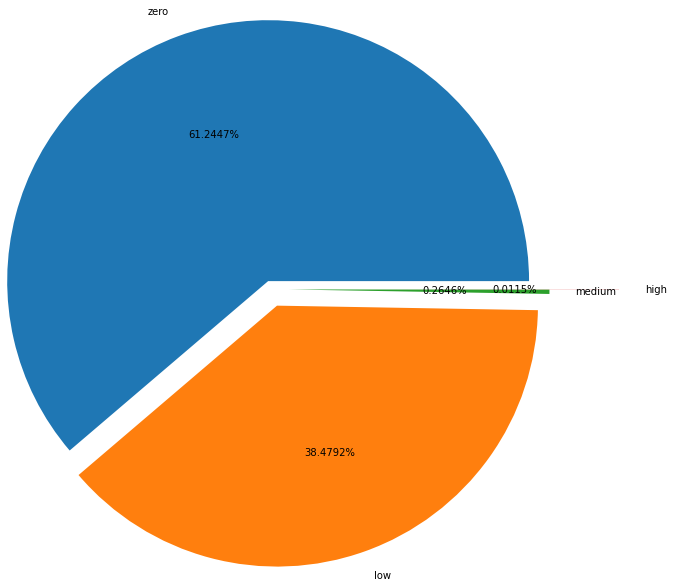

In [499]:
plt.pie(train2["Spa_group"].value_counts(),radius = 3, labels = ["zero","low","medium","high"], explode = [0.1,0.2,0.2,1],autopct = "%.4f%%")
plt.show()

In [500]:
train2["VRDeck"].min()

0.0

In [501]:
train2["VRDeck"].max()

24133.0

In [502]:
train2["VRDeck_group"] = pd.cut(x = train2["VRDeck"], bins = [-1,0,10000.0,20000.0,25000.0], labels = ["zero","low", "medium", "high"])
train2["VRDeck_group"]

0       zero
1        low
2        low
3        low
4        low
        ... 
8688     low
8689    zero
8690    zero
8691     low
8692     low
Name: VRDeck_group, Length: 8693, dtype: category
Categories (4, object): ['zero' < 'low' < 'medium' < 'high']

In [503]:
train2["VRDeck"].value_counts()

0.000000       5495
304.854791      188
1.000000        139
2.000000         70
3.000000         56
               ... 
297.000000        1
1788.000000       1
1113.000000       1
9244.000000       1
3235.000000       1
Name: VRDeck, Length: 1307, dtype: int64

In [504]:
train2["VRDeck_group"] = pd.cut(x = train2["VRDeck"], bins = [-1,0,10000.0,20000.0,25000.0], labels = ["zero","low", "medium", "high"])
train2["VRDeck_group"]

0       zero
1        low
2        low
3        low
4        low
        ... 
8688     low
8689    zero
8690    zero
8691     low
8692     low
Name: VRDeck_group, Length: 8693, dtype: category
Categories (4, object): ['zero' < 'low' < 'medium' < 'high']

In [505]:
train2["VRDeck_group"].value_counts()

zero      5495
low       3170
medium      26
high         2
Name: VRDeck_group, dtype: int64

In [506]:
train2["VRDeck_group"].value_counts()/len(train2)

zero      0.632118
low       0.364661
medium    0.002991
high      0.000230
Name: VRDeck_group, dtype: float64

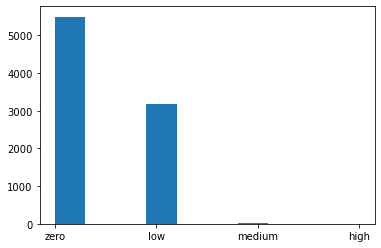

In [507]:
plt.hist(train2["VRDeck_group"])
plt.show()

In [508]:
# train2["VRDeck_group"] = train2["VRDeck_group"].replace({"zero":1, "low":2, "medium":3, "high":4},inplace = True)
train2["VRDeck_group"].replace({"zero":1, "low":2, "medium":3, "high":4},inplace = True)
train2["VRDeck_group"]
# train2["VRDeck_group"]

0       1
1       2
2       2
3       2
4       2
       ..
8688    2
8689    1
8690    1
8691    2
8692    2
Name: VRDeck_group, Length: 8693, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [509]:
train2["VRDeck_group"] = train2["VRDeck_group"].astype(int)
train2["VRDeck_group"]

0       1
1       2
2       2
3       2
4       2
       ..
8688    2
8689    1
8690    1
8691    2
8692    2
Name: VRDeck_group, Length: 8693, dtype: int32

In [510]:
print(train2.shape)

(8693, 20)


In [511]:
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


In [512]:
features = ["PassengerId","HomePlanet", "CryoSleep","Cabin", "Destination", "Name"]

In [573]:
a = train.drop("Transported", axis=1)
a

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,101,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,201,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,301,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,302,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,401,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,927601,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,927801,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,927901,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,928001,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [577]:
b = test
b

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,1301,Earth,True,G/3/S,TRAPPIST-1e,27.00000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,1801,Earth,False,F/4/S,TRAPPIST-1e,19.00000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,1901,Europa,True,C/0/S,55 Cancri e,31.00000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,2101,Europa,False,C/1/S,TRAPPIST-1e,38.00000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,2301,Earth,False,F/5/S,TRAPPIST-1e,20.00000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,926602,Earth,True,G/1496/S,TRAPPIST-1e,34.00000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,926901,Earth,False,A/11/P,TRAPPIST-1e,42.00000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,927101,Mars,True,D/296/P,55 Cancri e,28.82793,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,927301,Europa,False,D/297/P,55 Cancri e,28.82793,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [578]:
X_train = a
Y_train = train2["Transported"]
X_test  = b
X_train.shape, Y_train.shape, X_test.shape

((8693, 13), (8693,), (4277, 13))

In [579]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [581]:
train["CryoSleep"].dtype

dtype('O')

In [582]:
b["CryoSleep"].dtype

dtype('O')

In [606]:
from sklearn import preprocessing    
  
my_label = preprocessing.LabelEncoder()   
   
a["PassengerId"]= my_label.fit_transform(a["PassengerId"])   
a["HomePlanet"]= my_label.fit_transform(a["HomePlanet"])   
# a["CryoSleep"]= my_label.fit_transform(a["CryoSleep"])   
a["Cabin"]= my_label.fit_transform(a["Cabin"])   
a["Destination"]= my_label.fit_transform(a["Destination"])   
a["Name"]= my_label.fit_transform(a["Name"])   
 
# print(a["Name"])

In [151]:
a.info

<bound method DataFrame.info of       PassengerId  HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0               0           1     False     B/0/P    TRAPPIST-1e  39.0  False   
1               1           0     False     F/0/S    TRAPPIST-1e  24.0  False   
2               2           1     False     A/0/S    TRAPPIST-1e  58.0   True   
3               3           1     False     A/0/S    TRAPPIST-1e  33.0  False   
4               4           0     False     F/1/S    TRAPPIST-1e  16.0  False   
...           ...         ...       ...       ...            ...   ...    ...   
8688         8688           1     False    A/98/P    55 Cancri e  41.0   True   
8689         8689           0      True  G/1499/S  PSO J318.5-22  18.0  False   
8690         8690           0     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691         8691           1     False   E/608/S    55 Cancri e  32.0  False   
8692         8692           1     False   E/608/S    TRAPPIST-1e  44.0  False

In [605]:
 my_label = preprocessing.LabelEncoder()   
   
b["PassengerId"]= my_label.fit_transform(b["PassengerId"])   
b["HomePlanet"]= my_label.fit_transform(b["HomePlanet"])   
# b["CryoSleep"]= my_label.fit_transform(b["CryoSleep"])   
b["Cabin"]= my_label.fit_transform(b["Cabin"])   
b["Destination"]= my_label.fit_transform(b["Destination"])   
b["Name"]= my_label.fit_transform(b["Name"])

In [520]:
b.info

<bound method DataFrame.info of       PassengerId  HomePlanet CryoSleep     Cabin    Destination       Age  \
0               0           0      True     G/3/S    TRAPPIST-1e  27.00000   
1               1           0     False     F/4/S    TRAPPIST-1e  19.00000   
2               2           1      True     C/0/S    55 Cancri e  31.00000   
3               3           1     False     C/1/S    TRAPPIST-1e  38.00000   
4               4           0     False     F/5/S    TRAPPIST-1e  20.00000   
...           ...         ...       ...       ...            ...       ...   
4272         4272           0      True  G/1496/S    TRAPPIST-1e  34.00000   
4273         4273           0     False    A/11/P    TRAPPIST-1e  42.00000   
4274         4274           2      True   D/296/P    55 Cancri e  28.82793   
4275         4275           1     False   D/297/P    55 Cancri e  28.82793   
4276         4276           0      True  G/1498/S  PSO J318.5-22  43.00000   

        VIP  RoomService  FoodC

In [607]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

ValueError: could not convert string to float: 'False'

In [586]:
pred = Y_pred.astype(str)
# pred
pred = np.char.replace(pred,"0", "False")  #https://www.geeksforgeeks.org/numpy-string-operations-replace-function/
pred = np.char.replace(pred,"1", "True")
pred = pred.astype(str)
pred

NameError: name 'Y_pred' is not defined

In [609]:
submission["PassengerID"]

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerID, Length: 4277, dtype: object

In [488]:
columns = test.columns
columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [587]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

ValueError: could not convert string to float: 'False'

In [486]:
train = train.fillna(" ")
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [613]:
train.dtypes



PassengerId       int32
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
Cryosleep        object
dtype: object